## 6.3 텐서플로를 이용한 CNN 구현

CNN은 텐서플로에서 `nn.conv2d()`라는 함수로 구현되어 있다. 사용법은 다음과 같다.

```
tf.nn.conv2d(input, filters, strides, padding)
```


`input` 인수는 입력 이미지 집합이다. 이미지 집합은 다음과 같은 4차원 데이터이어야 한다. 

* [batch, in_height, in_width, in_channels]

  * batch: 이미지 개수
  * in_height: 이미지의 높이
  * in_width: 이미지의 폭
  * in_channels: 이미지의 컬러 채널(흑백은 1, 칼라는 3)

`filters`는 필터 데이터다. 이 인수도 다음과 같은 4차원 데이터이어야 한다.

* [filter_height, filter_width, in_channels, out_channels]

  * filter_height: 필터의 높이
  * filter_width: 필터의 폭
  * in_channels: 필터에 입력되는 이미지의 컬러 채널(흑백은 1, 칼라는 3)
  * out_channels: 필터의 종류, 출력 채널의 수

`strides` 인수는 길이가 4인 벡터다. 첫 번째와 네 번째 수는 항상 1이어야 한다. 두 번째와 세 번째 수는 가로방향과 세로방향으로 스캐닝을 할 때 건너뛰는 데이터의 숫자다. 만약 데이터를 건너뛰지 않고 모두  필터링하는 경우에는 strides = [1, 1, 1, 1]이다.

`padding` 인수는 `"VALID"` 또는 `"SAME"` 문자열이다. 패딩을 하지 않는 경우에는 `"VALID"`, 동일크기 패딩을 하는 경우에는 `"SAME"` 문자열을 입력한다. 

In [6]:
from sklearn.datasets import load_digits
images = load_digits().data
images.shape

(1797, 64)

In [7]:
images = images.reshape(1797, 8, 8)
images = np.expand_dims(images, -1)
images.shape

(1797, 8, 8, 1)

In [8]:
filters = np.ones((3, 3, 1, 1), dtype=np.float32)
filters.shape

(3, 3, 1, 1)

In [9]:
import tensorflow as tf

conv2d = tf.nn.conv2d(images, filters, strides=[1, 1, 1, 1], padding="SAME")
conv2d.shape

TensorShape([1797, 8, 8, 1])

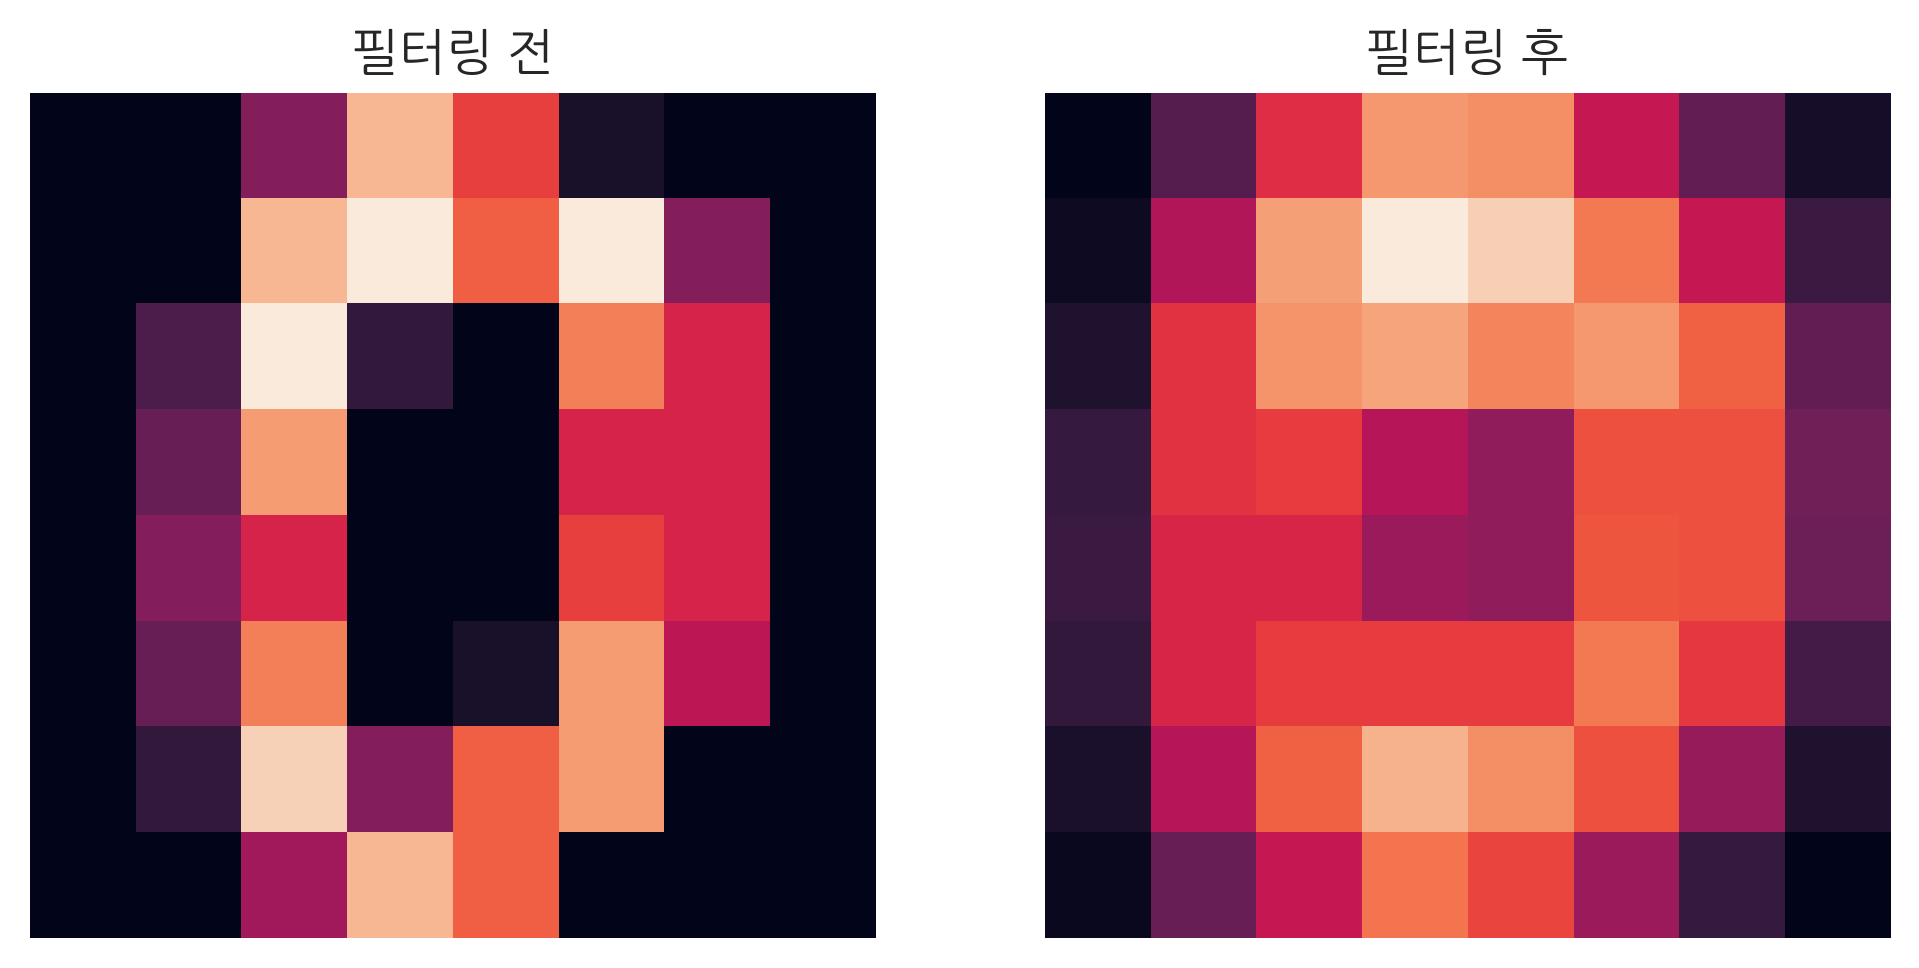

In [10]:
plt.subplot(121)
plt.imshow(images[0, :, :, 0])
plt.title("필터링 전")
plt.axis("off")
plt.subplot(122)
plt.imshow(conv2d[0, :, :, 0])
plt.title("필터링 후")
plt.axis("off")
plt.show()